<a href="https://www.kaggle.com/code/luiskalckstein/htl-spengergasse-5ehif-2024-dbi?scriptVersionId=160306546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.dates as mdates
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
df['date'] = pd.to_datetime(df['date'])

# How do various weather parameters (mean temperature, humidity, wind speed, and mean pressure) in Delhi change over time and what *Mean Pressure* patterns can be observed on a seasonal and annual basis from 2013 to 2017?


## 1. Exploratory Data Analysis (EDA)

In [3]:
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [4]:
print(f"The climate data ranges from {df.date[0]} to {df.date.tail(1)}")

The climate data ranges from 2013-01-01 00:00:00 to 1461   2017-01-01
Name: date, dtype: datetime64[ns]


The data consists of 5 columns, one of which is the date by which the data is sorted. The other 4 represent daily, quantitative and continous records of the climate in Dheli.

In [5]:
df.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


In [6]:
for col in df.columns[1:]:
    print(f'The column {col} has {sum(df[col].isna())} non-numerical values.')

The column meantemp has 0 non-numerical values.
The column humidity has 0 non-numerical values.
The column wind_speed has 0 non-numerical values.
The column meanpressure has 0 non-numerical values.


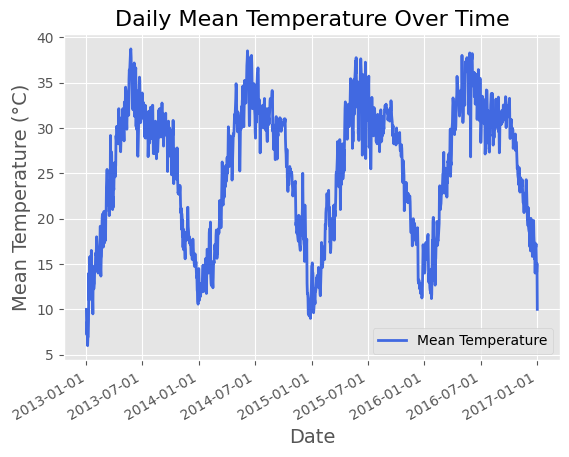

In [7]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(df['date'], df['meantemp'], label='Mean Temperature', color='royalblue', linewidth=2)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Mean Temperature (°C)', fontsize=14)
ax.set_title('Daily Mean Temperature Over Time', fontsize=16)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, if you want to rotate the date labels to prevent overlap
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend()
fig.autofmt_xdate()
plt.show()

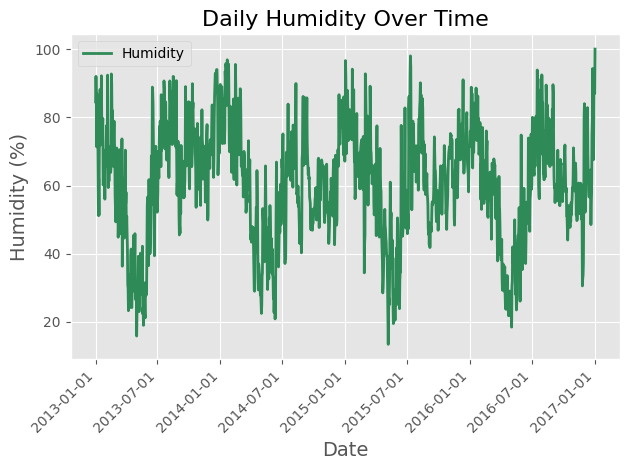

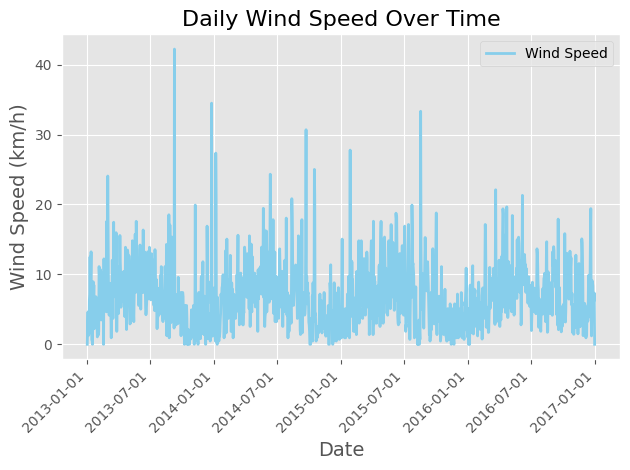

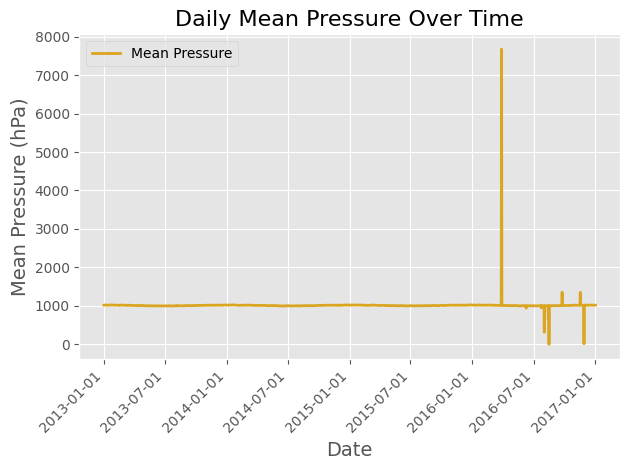

In [8]:
### Humidity
fig, ax1 = plt.subplots()
ax1.plot(df['date'], df['humidity'], label='Humidity', color='seagreen', linewidth=2)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Humidity (%)', fontsize=14)
ax1.set_title('Daily Humidity Over Time', fontsize=16)
ax1.legend()
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# Wind Speed
fig, ax2 = plt.subplots()
ax2.plot(df['date'], df['wind_speed'], label='Wind Speed', color='skyblue', linewidth=2)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Wind Speed (km/h)', fontsize=14)
ax2.set_title('Daily Wind Speed Over Time', fontsize=16)
ax2.legend()
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# Mean Pressure
fig, ax3 = plt.subplots()
ax3.plot(df['date'], df['meanpressure'], label='Mean Pressure', color='goldenrod', linewidth=2)
ax3.set_xlabel('Date', fontsize=14)
ax3.set_ylabel('Mean Pressure (hPa)', fontsize=14)
ax3.set_title('Daily Mean Pressure Over Time', fontsize=16)
ax3.legend()
ax3.xaxis.set_major_locator(mdates.AutoDateLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()

The daily mean pressure seems to have exceptionally high outliers between 2016 and 2017. This clearly indicates a measurement error, as it would make contextually absolutely no sense to have such a spike for one single day. In order to analyze it to get actual insights, I will identify and drop this outlier.

In [9]:
print(df["meanpressure"].describe())
print(f'Number of values above 7000 hPa: {sum(df["meanpressure"] > 7000)}')

count    1462.000000
mean     1011.104548
std       180.231668
min        -3.041667
25%      1001.580357
50%      1008.563492
75%      1014.944901
max      7679.333333
Name: meanpressure, dtype: float64
Number of values above 7000 hPa: 1


In [10]:
df = df[df["meanpressure"]<7000]
print(df["meanpressure"].describe())

count    1461.000000
mean     1006.540394
std        45.046526
min        -3.041667
25%      1001.571429
50%      1008.555556
75%      1014.937500
max      1352.615385
Name: meanpressure, dtype: float64


It is clear to see how strongly a single outlier and measurement error can influence the standard deviation.

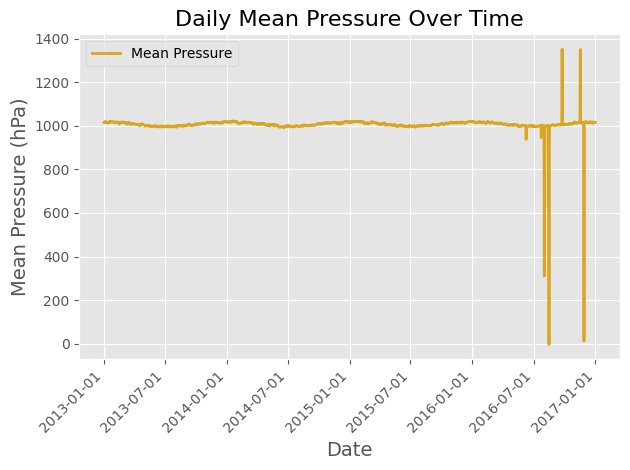

In [11]:
# Mean Pressure
fig, ax3 = plt.subplots()
ax3.plot(df['date'], df['meanpressure'], label='Mean Pressure', color='goldenrod', linewidth=2)
ax3.set_xlabel('Date', fontsize=14)
ax3.set_ylabel('Mean Pressure (hPa)', fontsize=14)
ax3.set_title('Daily Mean Pressure Over Time', fontsize=16)
ax3.legend()
ax3.xaxis.set_major_locator(mdates.AutoDateLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()

Only after removing the largest outlier does it become apparent how much some measured values still differ from the others (with a similar pattern). After a little research [[src](https://www.metoffice.gov.uk/weather/learn-about/weather/how-weather-works/high-and-low-pressure#:~:text=Pressure%20is%20measured%20in%20hectoPascals,on%20the%20area%20around%20it
)], it becomes clear that the other outliers must also be measurement errors. I will therefore remove them so that they do not influence the further analysis. 

An interesting approach to quantify the outlier is the so-called Z-score, which I found on the Internet. It calculates for each value "how many standard deviations" a value is away from the mean. I think this is a good way of identifying and subsequently removing incorrect measured values.


In [12]:
df['z_score'] = (df['meanpressure'] - df['meanpressure'].mean()) / df['meanpressure'].std()
#After mutliple iterations I chose a maximum Z-score of 1.3. It might seem too low, as data could vary, 
#but for this specific case of hPa, there is no such outlier possible.
print(f'Length before removing the outliers: {len(df)}')
df = df[df['z_score'].abs() <= 1.3]
print(f'Length after removing the outliers: {len(df)}')

Length before removing the outliers: 1461
Length after removing the outliers: 1453


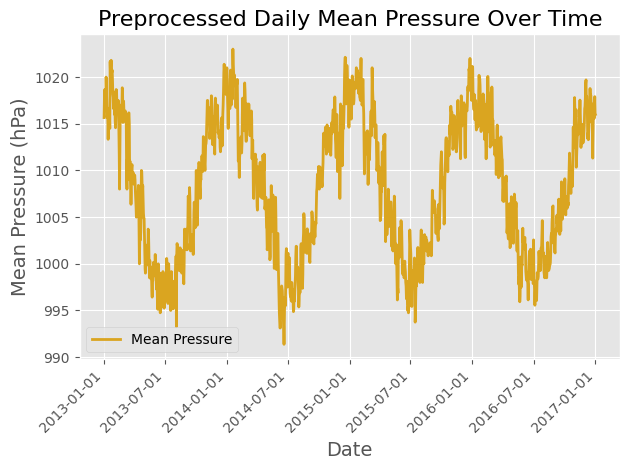

In [13]:
# Mean Pressure
fig, ax3 = plt.subplots()
ax3.plot(df['date'], df['meanpressure'], label='Mean Pressure', color='goldenrod', linewidth=2)
ax3.set_xlabel('Date', fontsize=14)
ax3.set_ylabel('Mean Pressure (hPa)', fontsize=14)
ax3.set_title('Preprocessed Daily Mean Pressure Over Time', fontsize=16)
ax3.legend()
ax3.xaxis.set_major_locator(mdates.AutoDateLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.show()

With this cleaned data, it is now possible to recognize patterns in the data that indicate a seasonality. To better understand the range of the values, I'll show them in a box plot.

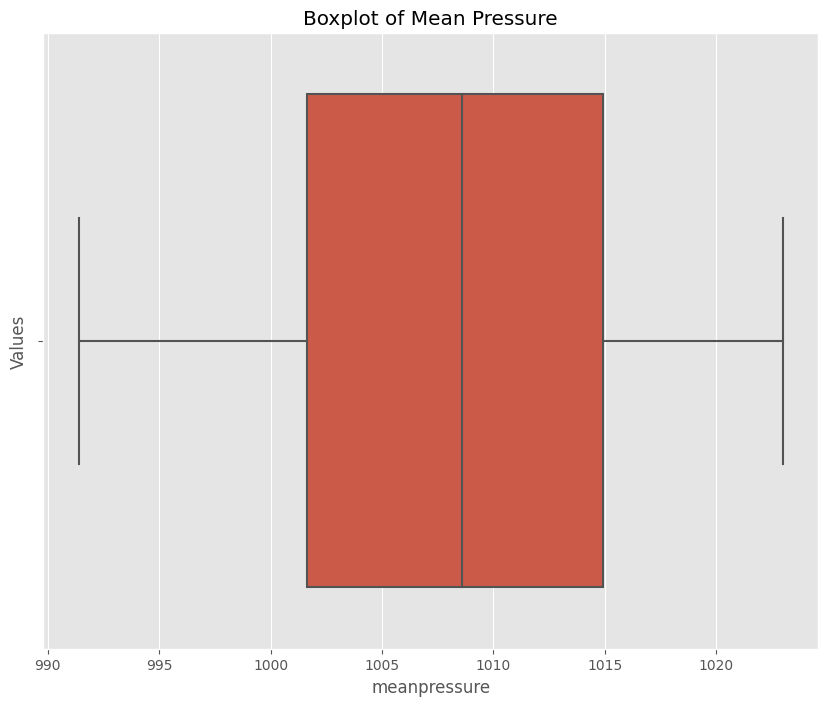

In [14]:
plt.figure(figsize=(10, 8))  
sns.boxplot(x=df['meanpressure'])
plt.title('Boxplot of Mean Pressure')
plt.ylabel('Values')
plt.show()

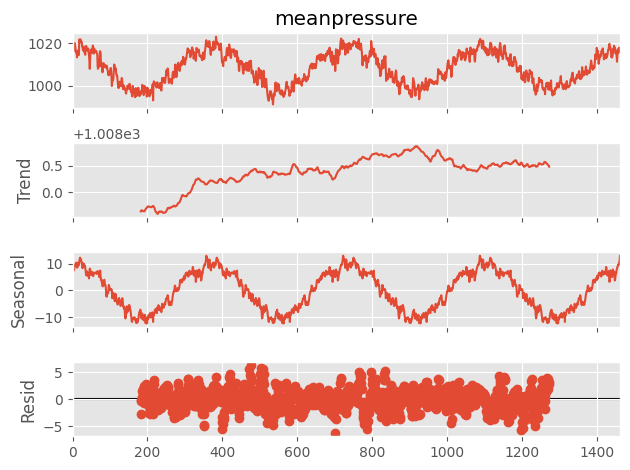

In [15]:
decomposition = seasonal_decompose(df['meanpressure'], model='additive', period=365)
decomposition.plot()
plt.show()

Seasonal Decomposition [[src](https://saturncloud.io/glossary/time-series-decomposition/)] is a statistical method used to separate a time series into three distinct components: trend, seasonality, and residual (or irregular) measurments. This process allows for a clearer understanding of the underlying patterns and influences within the data, particularly those related to seasonal variations.

The seasonal decomposition of India's mean pressure shows clear trends and patterns. For example, it is clearly visible that the mean pressure contains spikes that occour regularly and seem to repeat annualy. The general trend varies in velocity but is clearly upwards over the years. The third chart points out the seasonal pattern which seems to be sufficient to be predicted by a statistical model or even machine learning. I will try to predict it using the ARIMA model (Auto Regressive Integrated Moving Average) which is a state-of-the-art statistical Time Series Foreacsting model. [[src1](https://www.kdnuggets.com/2023/08/times-series-analysis-arima-models-python.html)], [[src2](https://www.youtube.com/watch?v=3UmyHed0iYE)]

In [16]:
train_length = int(len(df)*0.8)
train_df, test_df = df.iloc[:train_length], df.iloc[train_length:]

In [17]:
history = [x for x in train_df.meanpressure]
y = test_df.meanpressure
# make first prediction
predictions = list()
#Parameters (1,1,1) are the inputs for each ARIMA part, so AR(1), I(1) and MA(1)
model = ARIMA(history, order=(1,1,1))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y.iloc[0])

The history variable in this context is used to store all the observations from the start of the training set up to the current time point in the test dataset. With each new prediction made, the true observation for that prediction is appended to the history. This is done because ARIMA models make a prediction for the next time step based on the history of observations. The history needs to be updated with the actual observations to maintain the sequence of data points for the ARIMA model to function correctly. It ensures that the model has all available data up to the current "present" moment when making each forecast.

This iterative approach to updating the ARIMA model with the actual observations as they become available is commonly used in time series forecasting to simulate a real-world scenario where forecasts are made in a step-by-step fashion and the model is updated as new actual data comes in.

If someone would like to extend the forcasting horizon (how far in the future the predictions should go), the model would predict day by day, while adding each prediction to the history, which in this case would represent future scenarios then.

In [18]:
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y.iloc[i]
    history.append(obs)

In [19]:
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 2.3110881055340315
MAE: 1.2100819747187368
RMSE: 1.5202263336536541


The Mean Squared Error (MSE) is the mean of the squared differences between the predicted values and the actual values. It gives a rough idea of the magnitude of error. The formular is $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$ where y is the actual value and $\hat{y}$ the predictions. The RMSE is just the square root of the MSE.



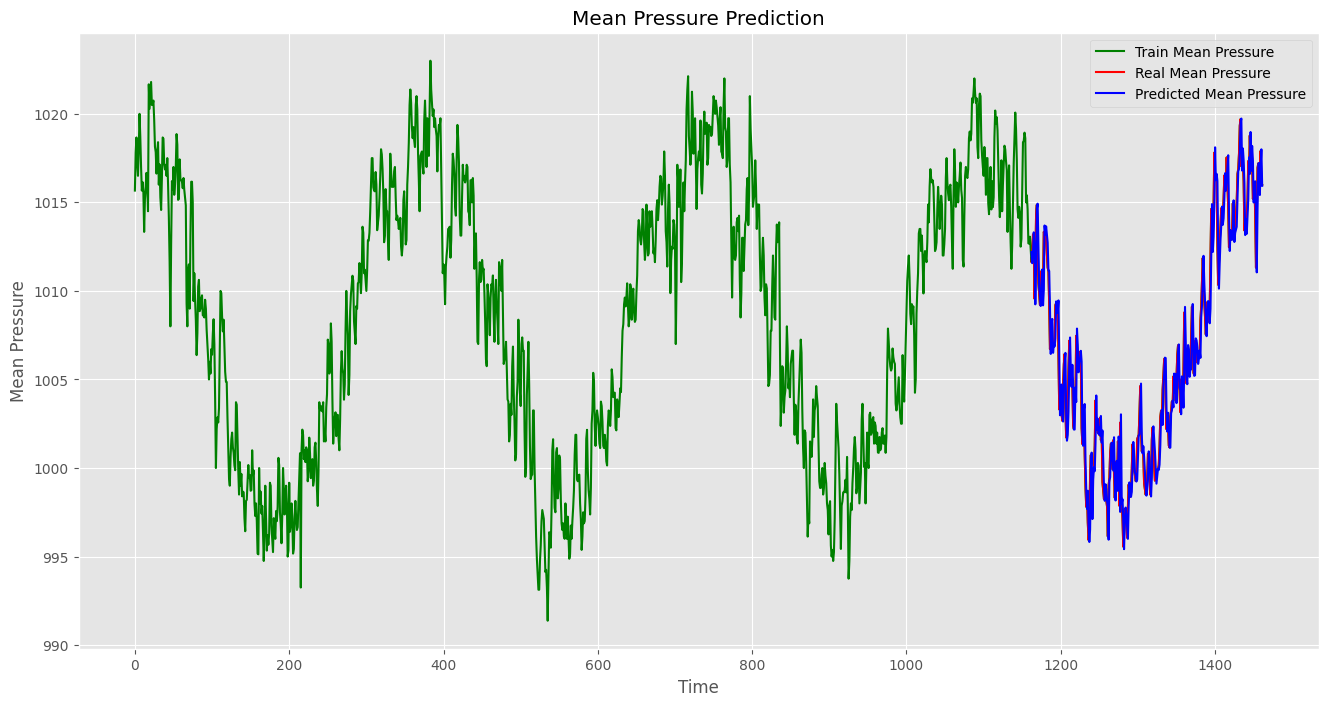

In [20]:
plt.figure(figsize=(16,8))
plt.plot(df['meanpressure'], color='green', label = 'Train Mean Pressure')
plt.plot(test_df.index, y, color = 'red', label = 'Real Mean Pressure')
plt.plot(test_df.index, predictions, color = 'blue', label = 'Predicted Mean Pressure')
plt.title('Mean Pressure Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.grid(True)
plt.show()

As in the tutorial I followed for this implementation, the predictions look almost perfect! So we would have a perfect model for every spike... right?
I better take a closer look haha

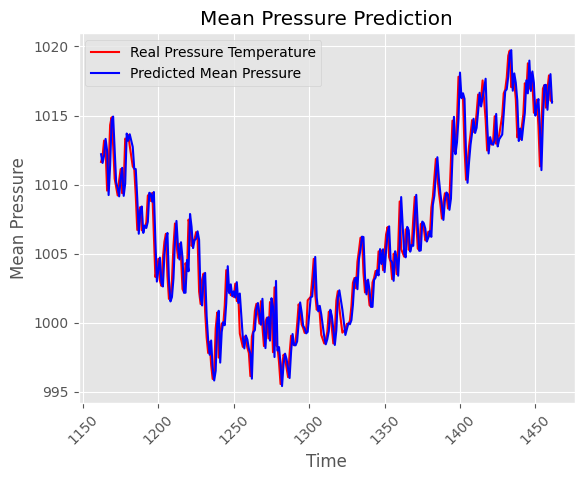

In [21]:
plt.plot(test_df.index, y, color = 'red', label = 'Real Pressure Temperature')
plt.plot(test_df.index, predictions, color = 'blue', label = 'Predicted Mean Pressure')
plt.title('Mean Pressure Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

I almost thought so... If you look closely, you'll notice that the Real Mean Temperature values are always a small step ahead in their behavior. By adding these real values to the history of values, on which ARIMA then predicts, the predictions always lag a little. 

This means that these predictions are definitely not as great and perfect as they look at first glance. This approach was probably chosen to make the tutorial seem super great. My learning is, that it is always crucial to really check the quality of predictions and not just belive beutiful graphs. 

## What would the prediction look like if the forecasting horizon would actually be as big as the testset?


In [22]:
# Preparing data
history = [x for x in train_df.meanpressure]
predictions = []
for i in range(len(test_df)):
    # predict
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # Add the prediction to the history (instead of the real observation)
    history.append(yhat)

In [23]:
# Evaluate 
y = test_df.meanpressure
mse = mean_squared_error(y, predictions)
print('MSE:', mse)
mae = mean_absolute_error(y, predictions)
print('MAE:', mae)
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE:', rmse)

MSE: 45.536372844065866
MAE: 5.893260208008584
RMSE: 6.748064377587537


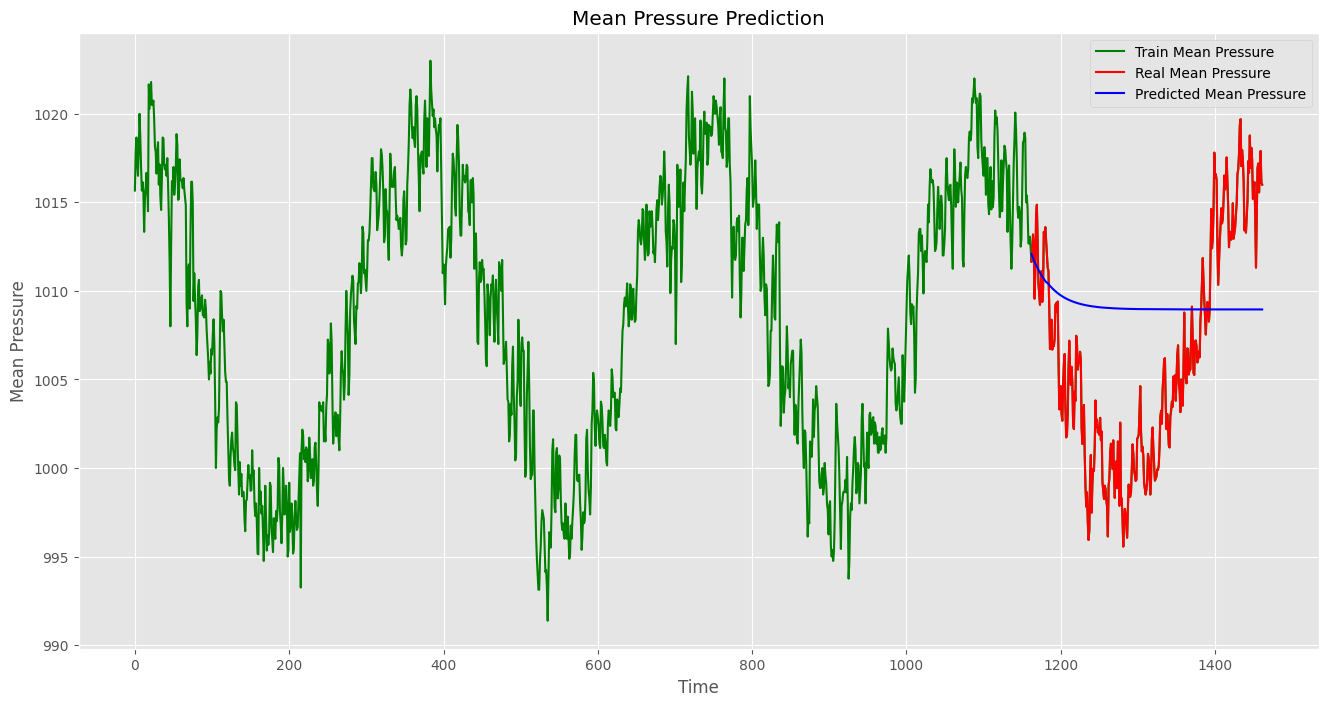

In [24]:
# Plot
plt.figure(figsize=(16,8))
plt.plot(df['meanpressure'], color='green', label='Train Mean Pressure')
plt.plot(test_df.index, y, color='red', label='Real Mean Pressure')
plt.plot(test_df.index, predictions, color='blue', label='Predicted Mean Pressure')
plt.title('Mean Pressure Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.grid(True)
plt.show()

Considering this poor performance, I think this particular model is just not the right choice for such a long forecasting horizon. It probably performs well in many use-cases, but not here in this way.  